# A Guide On Solving Non-Convex Consumption-Saving Models - 2D

This notebook produces the timing and accuracy results for the *extended* benchmark model *with two durable stocks* in [A Guide to Solve Non-Convex Consumption-Saving Models](https://doi.org/10.1007/s10614-020-10045-x).

**Computer used for timings:** Windows 10 computer with 2x Intel(R) Xeon(R) Gold 6254 3.10 GHz CPUs (18 cores, 36 logical processes each) and 768 GB of RAM.

# Setup

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np

# load the DurableConsumptionModel module
from DurableConsumptionModel import DurableConsumptionModelClass

## Install NLopt

In [2]:
import consav
consav.cpptools.setup_nlopt()

## Choose number of threads in numba

In [3]:
import numba as nb
nb.set_num_threads(8)

# Timing function

In [4]:
def run(name = 'baseline',
        load = False,
        solmethod = 'nvfi_cpp_2d',
        updpar = {},
        do_print = False):
    
    # a. create model
    par = {'solmethod':solmethod,'do_print':do_print,**updpar}    
    model = DurableConsumptionModelClass(name=name,load=load,par=par)
        
    # b. run
    if load == False:
        
        # i. link
        model.link_to_cpp(force_compile=False)
            
        # ii. solve
        model.solve()        
        
        total_time = np.sum(model.par.time_w+model.par.time_keep+model.par.time_adj)
        print(f'total time = {total_time:.2f}')
                
        # iii. simulate
        model.simulate(do_euler_error=True,do_utility=True)
    
        # iv. save
        model.save()

    # c. print progress
    print('')    
    model.print_analysis()        
    model.checksum(simple=True)
    print('')
    
    return model

# Settings

In [5]:
load = False
load_negm_cpp_2d = load
load_nvfi_cpp_2d = load
load_vfi_cpp_2d = load

T = 50
models = dict()

# baseline
basename = 'results'
base = dict()
base['do_2d'] = True
base['n_max'] = 2.0
base['Np'] = 50
base['Nn'] = 50
base['Nm'] = 100
base['Nx'] = 100
base['Na'] = 100
base['T'] = T

# Timings

In [6]:
models['negm_2d_cpp'] = run(name=f'{basename}',load=load_negm_cpp_2d,solmethod='negm_2d_cpp',updpar=base)
models['nvfi_2d_cpp'] = run(name=f'{basename}',load=load_nvfi_cpp_2d,solmethod='nvfi_2d_cpp',updpar=base)
models['vfi_2d_cpp'] = run(name=f'{basename}',load=load_vfi_cpp_2d,solmethod='vfi_2d_cpp',updpar=base)

total time = 328.69

Name: results (solmethod = negm_2d_cpp)
Grids: (p,n,m,x,a) = (50,50,100,100,100)
Timings:
 total: 328.7
     w: 270.9
  keep: 44.8
   adj: 13.0
Utility: -34.294879
Euler errors:
     total: -3.58 (-4.73,-2.36)
   keepers: -3.48 (-4.60,-2.35)
 adjusters: -3.82 (-4.94,-2.78)
      both: -1.27 (-1.40,-1.01)
        d1: -3.99 (-4.76,-3.25)
        d2: -3.90 (-4.60,-3.30)
Moments:
 adjuster share: 0.310
           both: 0.026
        only d1: 0.104
        only d2: 0.180
         mean c: 0.978
          var c: 0.254
         mean d1: 0.377
          var d1: 0.050
         mean d2: 0.214
          var d2: 0.018

checksum, inv_v_keep: 0.03983273
checksum, inv_v_adj_full: 0.03944954
checksum, inv_v_adj_d1_2d: 0.04047167
checksum, inv_v_adj_d2_2d: 0.04056766

total time = 766.39

Name: results (solmethod = nvfi_2d_cpp)
Grids: (p,n,m,x,a) = (50,50,100,100,100)
Timings:
 total: 766.4
     w: 161.2
  keep: 592.3
   adj: 12.9
Utility: -34.289393
Euler errors:
     total: -3.75 

# Tables

In [7]:
import tabs

In [8]:
main_models = [models['vfi_2d_cpp'],models['nvfi_2d_cpp'],models['negm_2d_cpp']]
tabs.all(main_models,speedup=True,postfix='_2d')

# Figures

In [9]:
from figs import lifecycle_compare

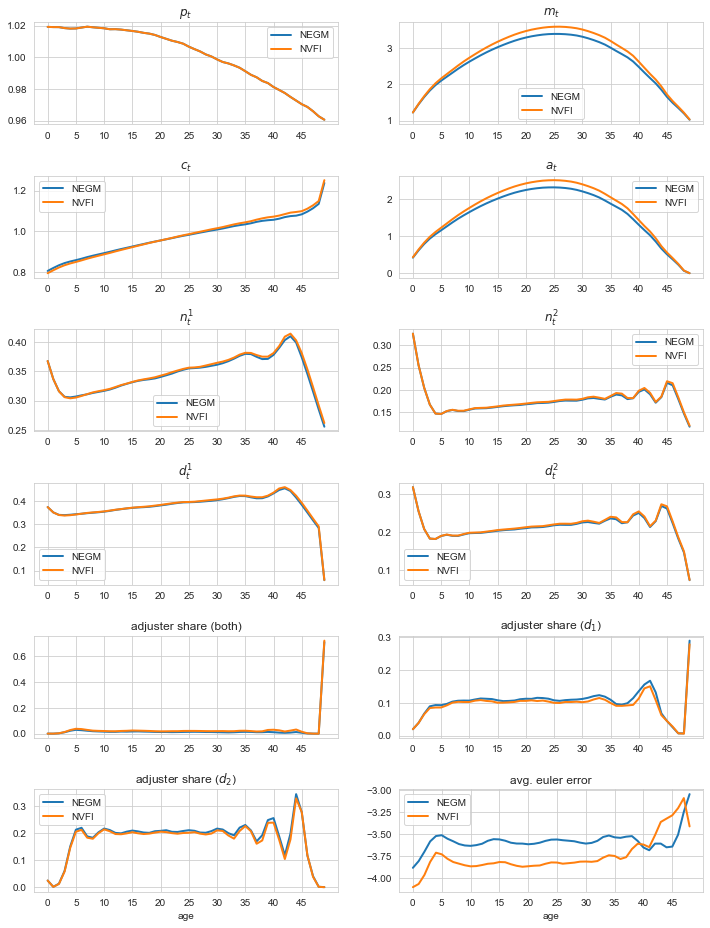

In [10]:
lifecycle_compare(models['negm_2d_cpp'],'NEGM',models['nvfi_2d_cpp'],'NVFI',do_euler_errors=True)

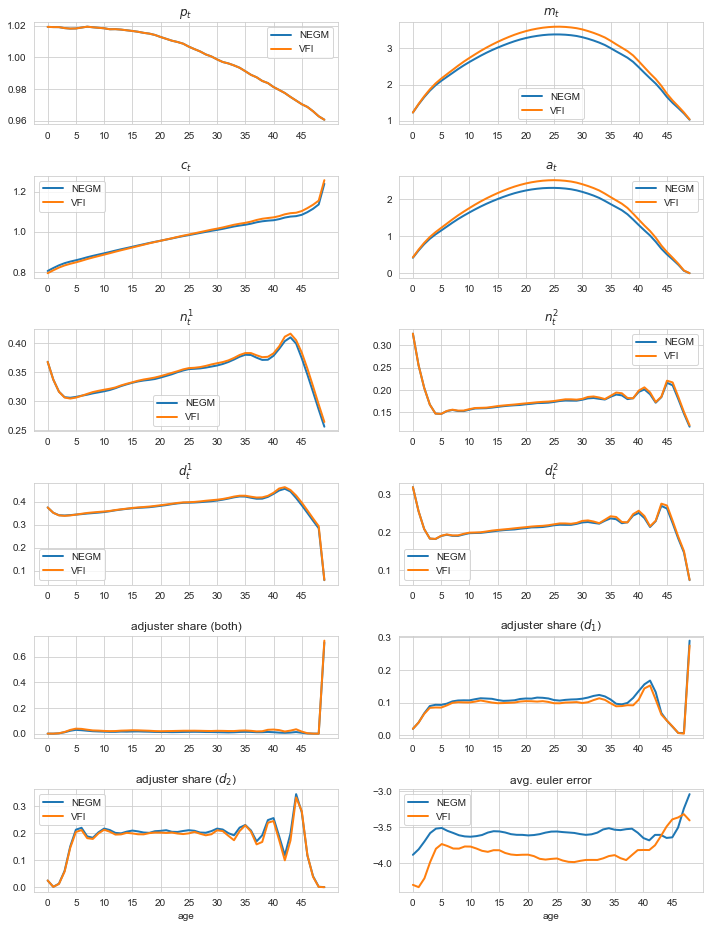

In [11]:
lifecycle_compare(models['negm_2d_cpp'],'NEGM',models['vfi_2d_cpp'],'VFI',do_euler_errors=True)